In [1]:
from mock_vasp import mock_vasp, TEST_DIR
from mock_lobster import mock_lobster


ref_paths = {
        "relax 1": "Si_lobster_uniform/relax_1",
        "relax 2": "Si_lobster_uniform/relax_2",
        "static": "Si_lobster_uniform/static",
        "non-scf uniform": "Si_lobster_uniform/non-scf_uniform",
    }
ref_paths_lobster = {
        "lobster_run_0": "Si_lobster/lobster_0",
    }

/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


We first load a structure that we want to analyze with bonding analysis.

In [2]:
from jobflow import JobStore, run_locally
from maggma.stores import MemoryStore
from pymatgen.core import Structure

from atomate2.vasp.flows.lobster import VaspLobsterMaker, LobsterMaker
from atomate2.vasp.powerups import update_user_incar_settings

job_store = JobStore(MemoryStore(), additional_stores={"data": MemoryStore()})
si_structure = Structure.from_file(TEST_DIR / "structures" / "Si.cif")

Then, we initialize a workflow:

In [3]:
job = VaspLobsterMaker(lobster_maker=LobsterMaker(
                task_document_kwargs={
                "calc_quality_kwargs": {"potcar_symbols": ["Si"], "n_bins": 10},
                "add_coxxcar_to_task_document": True,
            },
            user_lobsterin_settings={
                "COHPstartEnergy": -5.0,
                "COHPEndEnergy": 5.0,
                "cohpGenerator": "from 0.1 to 3.0 orbitalwise",
            },
        ),
        delete_wavecars=True,
    ).make(si_structure)
job = update_user_incar_settings(job, {"NPAR": 4})

# run the flow or job and ensure that it finished running successfully



We then run this workflow locally to show-case the capabilities. In real-life, you would omit the `mock*` parts.

In [4]:
with mock_vasp(ref_paths) as mf:
    with mock_lobster(ref_paths_lobster) as mf2:
        responses = run_locally(
        job, store=job_store, create_folders=True, ensure_success=True)

2025-02-10 17:23:35,816 INFO Started executing jobs locally
2025-02-10 17:23:35,824 INFO Starting job - relax 1 (cf0e7b23-c5f8-4ac3-8a2d-4762f2cf5e38)
2025-02-10 17:23:36,015 INFO Finished job - relax 1 (cf0e7b23-c5f8-4ac3-8a2d-4762f2cf5e38)
2025-02-10 17:23:36,015 WARNING Response.stored_data is not supported with local manager.
2025-02-10 17:23:36,016 INFO Starting job - relax 2 (b8a483e9-ea94-4b3a-9e35-6d54310ccd0f)


/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/pymatgen/io/vasp/outputs.py:1219: UserWarning: No POTCAR file with matching TITEL fields was found in

  warnings.warn("No POTCAR file with matching TITEL fields was found in\n" + "\n  ".join(potcar_paths))
/smb/jgeorge/hpc-user/PycharmProjects/2025_Update_atomate2_doc/atomate2/src/atomate2/common/files.py:268: UserWarning: /tmp/tmpdzzrblpr/job_2025-02-10-16-23-36-016113-19978/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)


2025-02-10 17:23:36,276 INFO Finished job - relax 2 (b8a483e9-ea94-4b3a-9e35-6d54310ccd0f)
2025-02-10 17:23:36,277 WARNING Response.stored_data is not supported with local manager.
2025-02-10 17:23:36,277 INFO Starting job - get_basis_infos (9ca5ae0e-5139-4396-8578-432628fe0efe)
2025-02-10 17:23:36,327 INFO Finished job - get_basis_infos (9ca5ae0e-5139-4396-8578-432628fe0efe)
2025-02-10 17:23:36,328 INFO Starting job - update_user_incar_settings_maker (28e68e55-6a8f-495c-a21e-915c4f257a52)
2025-02-10 17:23:36,469 INFO Finished job - update_user_incar_settings_maker (28e68e55-6a8f-495c-a21e-915c4f257a52)
2025-02-10 17:23:36,471 INFO Starting job - static (50c6b38c-3d3b-48e5-ab9f-41d0d2e50487)


/smb/jgeorge/hpc-user/PycharmProjects/2025_Update_atomate2_doc/atomate2/src/atomate2/common/files.py:268: UserWarning: /tmp/tmpdzzrblpr/job_2025-02-10-16-23-36-471242-51151/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)


2025-02-10 17:23:36,711 INFO Finished job - static (50c6b38c-3d3b-48e5-ab9f-41d0d2e50487)
2025-02-10 17:23:36,714 WARNING Response.stored_data is not supported with local manager.
2025-02-10 17:23:36,715 INFO Starting job - non-scf uniform (3d72d6fa-880f-433d-afbe-b76fb5c669c5)


/smb/jgeorge/hpc-user/PycharmProjects/2025_Update_atomate2_doc/atomate2/src/atomate2/common/files.py:268: UserWarning: /tmp/tmpdzzrblpr/job_2025-02-10-16-23-36-715060-90187/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)


2025-02-10 17:23:37,457 INFO Finished job - non-scf uniform (3d72d6fa-880f-433d-afbe-b76fb5c669c5)
2025-02-10 17:23:37,457 WARNING Response.stored_data is not supported with local manager.
2025-02-10 17:23:37,458 INFO Starting job - store_inputs (28e68e55-6a8f-495c-a21e-915c4f257a52, 2)
2025-02-10 17:23:37,459 INFO Finished job - store_inputs (28e68e55-6a8f-495c-a21e-915c4f257a52, 2)
2025-02-10 17:23:37,459 INFO Starting job - get_lobster_jobs (588c1175-8b0b-4436-af11-2e4137f64a37)
2025-02-10 17:23:37,498 INFO Finished job - get_lobster_jobs (588c1175-8b0b-4436-af11-2e4137f64a37)
2025-02-10 17:23:37,500 INFO Starting job - lobster_run_0 (fd14a831-a6f6-4079-a6df-f3325e2480e6)
{'calc_quality_kwargs': {'potcar_symbols': ['Si'], 'n_bins': 10}, 'add_coxxcar_to_task_document': True}
True


/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/pymatgen/io/lobster/inputs.py:699: UserWarning: Always check and test the provided basis functions. The spilling of your Lobster calculation might help
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['equivalent_atoms']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['international']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/lobsterpy/cohp/analyze.py:870: UserWarning: The bonding, antibonding integral/percent values are numerical estimate. T

{'e_range': [-20, 0], 'dos_comparison': True, 'n_bins': 10, 'bva_comp': True, 'potcar_symbols': ['Si']}


/smb/jgeorge/hpc-user/PycharmProjects/2025_Update_atomate2_doc/atomate2/src/atomate2/lobster/schemas.py:601: UserWarning: Oxidation states from BVA analyzer cannot be determined. Thus BVA charge comparison will be skipped
  cal_quality_dict = Analysis.get_lobster_calc_quality_summary(
/smb/jgeorge/hpc-user/PycharmProjects/2025_Update_atomate2_doc/atomate2/src/atomate2/lobster/schemas.py:601: UserWarning: Consider using DOSCAR.LSO.lobster, as non LSO DOS from LOBSTER can have negative DOS values
  cal_quality_dict = Analysis.get_lobster_calc_quality_summary(
/smb/jgeorge/hpc-user/PycharmProjects/2025_Update_atomate2_doc/atomate2/src/atomate2/lobster/schemas.py:601: UserWarning: Minimum energy range requested for DOS comparisons is not available in VASP or LOBSTER calculation. Thus, setting min_e to -5 eV
  cal_quality_dict = Analysis.get_lobster_calc_quality_summary(


2025-02-10 17:23:40,414 INFO Finished job - lobster_run_0 (fd14a831-a6f6-4079-a6df-f3325e2480e6)
2025-02-10 17:23:40,416 INFO Starting job - store_inputs (588c1175-8b0b-4436-af11-2e4137f64a37, 2)
2025-02-10 17:23:40,417 INFO Finished job - store_inputs (588c1175-8b0b-4436-af11-2e4137f64a37, 2)
2025-02-10 17:23:40,418 INFO Starting job - delete_lobster_wavecar (d1fbf5bd-91e4-454b-af3a-21deff67d474)
2025-02-10 17:23:41,137 INFO Finished job - delete_lobster_wavecar (d1fbf5bd-91e4-454b-af3a-21deff67d474)
2025-02-10 17:23:41,137 INFO Finished executing jobs locally


We can also analyze the data from the database

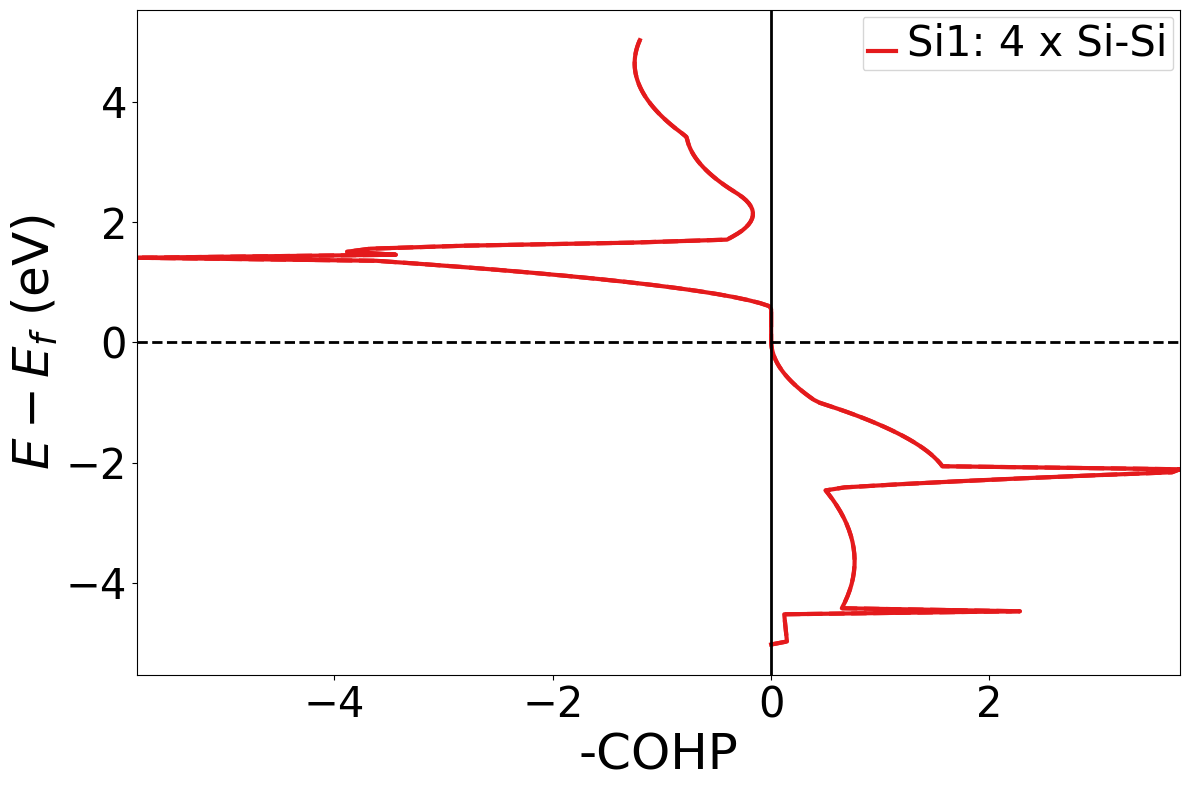

In [6]:

from jobflow import SETTINGS
from pymatgen.electronic_structure.cohp import Cohp
from pymatgen.electronic_structure.plotter import CohpPlotter

store = job_store

result = store.query_one(
    {"name": "lobster_run_0"},
    properties=[
        "output.lobsterpy_data.cohp_plot_data",
        "output.lobsterpy_data_cation_anion.cohp_plot_data",
    ],
    load=True,
)

for number, (key, cohp) in enumerate(
    result["output"]["lobsterpy_data"]["cohp_plot_data"]["data"].items()
):
    plotter = CohpPlotter()
    cohp = Cohp.from_dict(cohp)
    plotter.add_cohp(key, cohp)
    plotter.save_plot(f"plots_all_bonds{number}.pdf")

for number, (key, cohp) in enumerate(
    result["output"]["lobsterpy_data_cation_anion"]["cohp_plot_data"]["data"].items()
):
    plotter = CohpPlotter()
    cohp = Cohp.from_dict(cohp)
    plotter.add_cohp(key, cohp)
    plotter.show()